In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set_style('whitegrid')

In [2]:
df=pd.read_csv('heart_disease_dataset.csv')


In [3]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0,7,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2,7,1
300,57,1,4,130,131,0,0,115,1,1.2,2,1,7,1
301,57,0,2,130,236,0,2,174,0,0.0,2,1,3,1


In [4]:
df.columns 

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

There are thirteen features in Dataset
age: The person's age in years

sex: The person's sex (1 = male, 0 = female)

cp: The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)

trestbps: The person's resting blood pressure (mm Hg on admission to the hospital)

chol: The person's cholesterol measurement in mg/dl

fbs: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)

restecg: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)

thalach: The person's maximum heart rate achieved

exang: Exercise induced angina (1 = yes; 0 = no)

oldpeak: ST depression induced by exercise relative to rest

slope: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)

ca: The number of major vessels (0-3)

thal: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)

num: Heart disease (0 = no, 1 = yes)

In [5]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

There is no missing values in dataset 

# Percentage of people having heart disease 

In [6]:
num = df.groupby('num').size()
num

num
0    164
1    139
dtype: int64

In [7]:
#Converting Numerical Data into Categorical Data
def heart_disease(row):
    if row==0:
        return 'Absence'
    elif row==1:
        return 'Presence'

In [8]:
#Applying converted data into our dataset with new column - Heart_Disease

df['Heart_Disease']=df['num'].apply(heart_disease)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,Heart_Disease
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0,Absence
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1,Presence
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1,Presence
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0,Absence
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0,Absence


In [9]:
hd=df.groupby('Heart_Disease')['num'].count()
hd

Heart_Disease
Absence     164
Presence    139
Name: num, dtype: int64

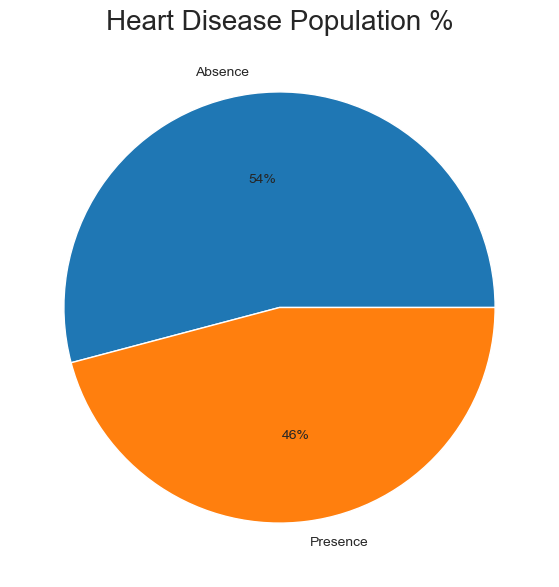

In [10]:
#Pie Chart Creation of Heart Disease Population % using MatplotLib

plt.figure(figsize=(10,7))
plt.pie(hd, labels=['Absence','Presence'],autopct='%0.0f%%')
plt.title('Heart Disease Population %', fontsize=20)
plt.show()

##### From the overall populaton, people having heart disease (46%) are lesser than those who have heart disease(56%)

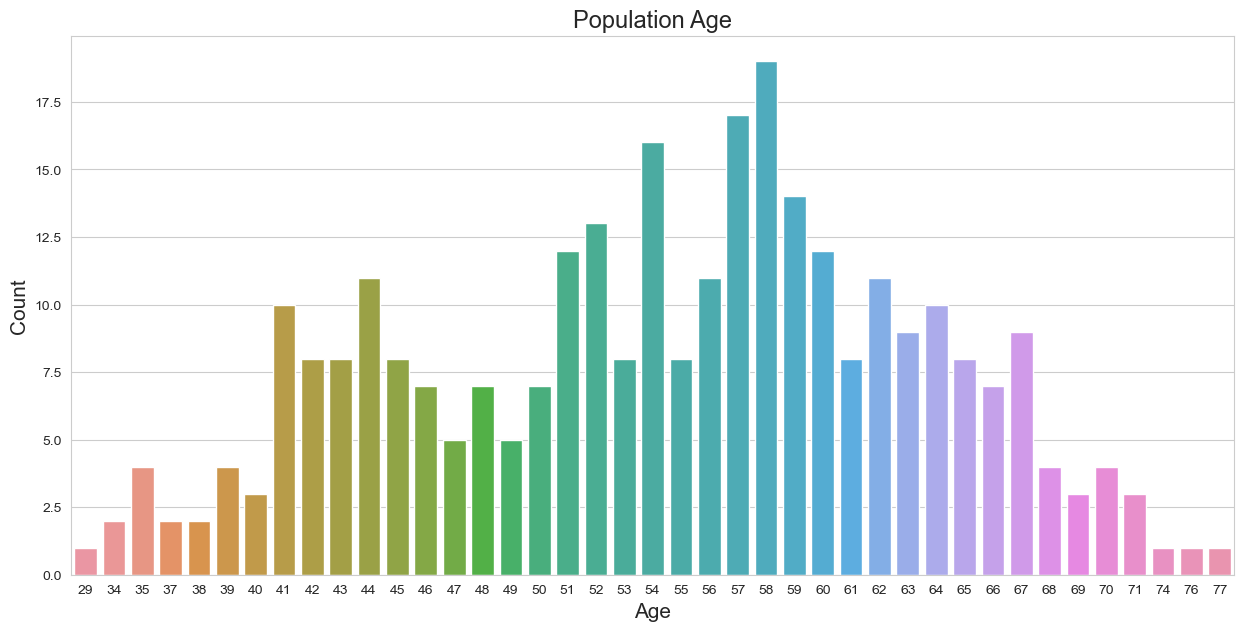

In [11]:
#Countplot Creation of Population Age using MatplotLib and Seaborn

plt.figure(figsize=(15,7))
sns.countplot(x='age', data=df)
plt.title('Population Age', fontsize=17)
plt.xlabel('Age', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.show()

#### In this section, the best analysis can be  divided into the elderly, middle-aged,young people by looking at the age ranges.

In [12]:
#Statistical Analysis

Min_Age=df['age'].min()
Max_Age=df['age'].max()
Mean_Age=df['age'].mean()

print("Minimum Age =",Min_Age)
print("Maximum Age =",Max_Age)
print("Mean Age =",Mean_Age)

Minimum Age = 29
Maximum Age = 77
Mean Age = 54.43894389438944


In [13]:
#Categorical Analysis

Young_Ages=df[(df['age']>=29) & (df['age']<40)]
Middle_Ages=df[(df['age']>=40) & (df['age']<55)]
Elderly_Ages=df[(df['age']>55)]

print('Young Ages =',len(Young_Ages))
print('Middle Ages =',len(Middle_Ages))
print('Elderly Ages =',len(Elderly_Ages))

Young Ages = 15
Middle Ages = 128
Elderly Ages = 152


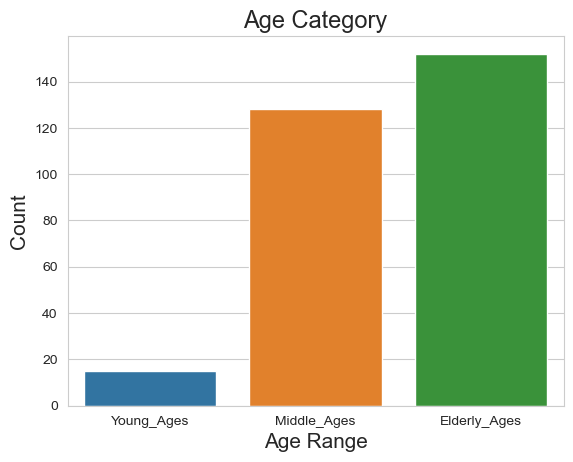

In [14]:
#Bar Plot Creation of Age Category using MatplotLib and Seaborn

sns.barplot(x=['Young_Ages','Middle_Ages','Elderly_Ages'], y=[len(Young_Ages), len(Middle_Ages), len(Elderly_Ages)])
plt.title('Age Category', fontsize=17)
plt.xlabel('Age Range', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.show()

In [15]:
def gender(row):
    if row==1:
        return 'Male'
    elif row==0:
        return 'Female'

In [16]:
df['sex1']=df['sex'].apply(gender)

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,Heart_Disease,sex1
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0,Absence,Male
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1,Presence,Male
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1,Presence,Male
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0,Absence,Male
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0,Absence,Female


In [17]:
def age_range(row):
    if row>=29 and row<40:
        return 'Young Age'
    elif row>=40 and row<55:
        return 'Middle Age'
    elif row>55:
        return 'Elder Age'

In [18]:
df['Age_Range']=df['age'].apply(age_range)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,Heart_Disease,sex1,Age_Range
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0,Absence,Male,Elder Age
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1,Presence,Male,Elder Age
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1,Presence,Male,Elder Age
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0,Absence,Male,Young Age
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0,Absence,Female,Middle Age


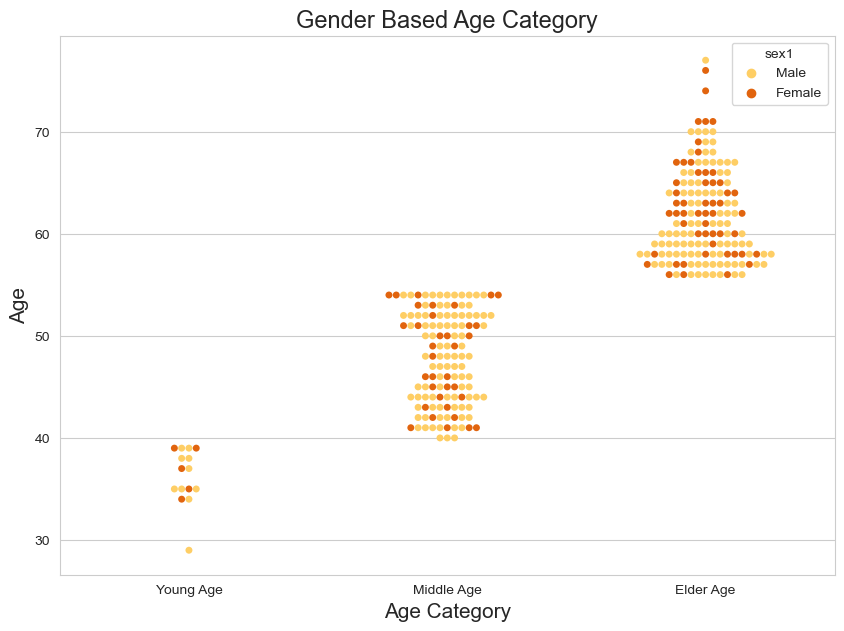

In [19]:
#Swarm Plot Creation of Gender Based Age Category using MatplotLib and Seaborn
#Here i have used swarn chart beacuse it avoids overlapping in two categorical data 

plt.figure(figsize=(10,7))
sns.swarmplot(x='Age_Range', y='age', hue='sex1', data=df, order=['Young Age','Middle Age','Elder Age'], palette='YlOrBr')
plt.title('Gender Based Age Category', fontsize=17)
plt.xlabel('Age Category', fontsize=15)
plt.ylabel('Age', fontsize=15)
plt.show()

##### In the above plot we found out that number of Males are more in midde age Category and Females are more in elder age category.

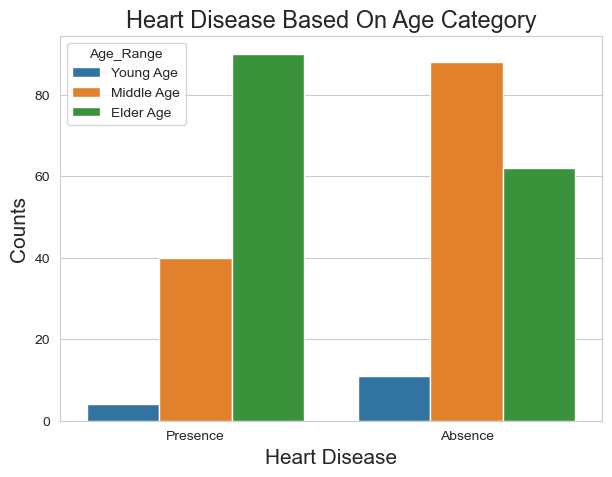

In [20]:
#Count Plot Creation of Heart Disease Based On Age Category using MatplotLib and Seaborn

plt.figure(figsize=(7,5))
hue_order=['Young Age', 'Middle Age', 'Elder Age']
sns.countplot(x='Heart_Disease', hue='Age_Range', data=df, order=['Presence','Absence'], hue_order=hue_order)
plt.title('Heart Disease Based On Age Category', fontsize=17)
plt.xlabel('Heart Disease', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.show()

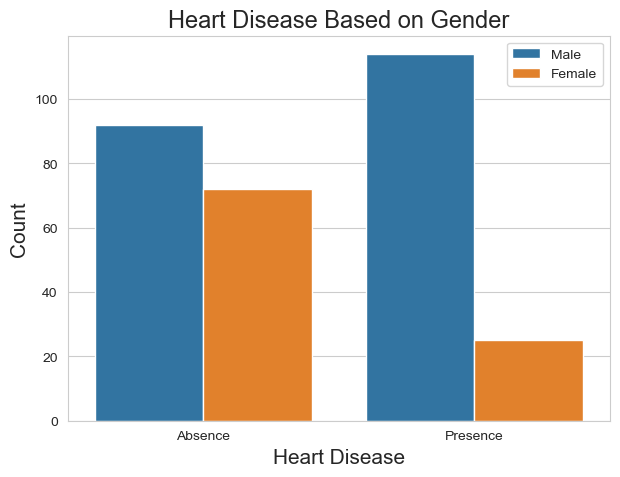

In [21]:
#Count Plot Creation of Heart Disease Based on Gender using MatplotLib and Seaborn

plt.figure(figsize=(7,5))
sns.countplot(x=df['Heart_Disease'], hue='sex1', data=df)
plt.xlabel('Heart Disease', fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.legend(labels=['Male','Female'])
plt.title('Heart Disease Based on Gender',fontsize=17)
plt.show()

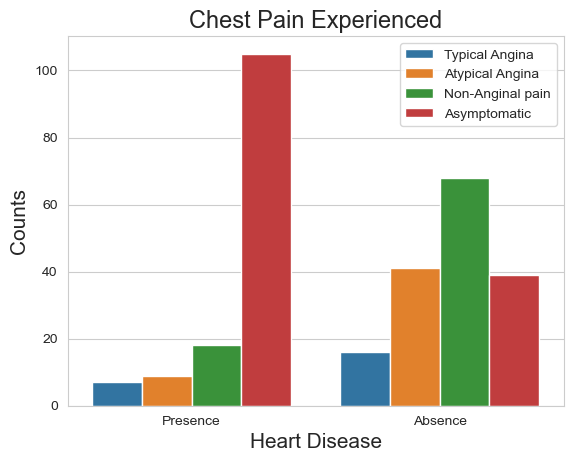

In [22]:
#Count Plot Creation of Chest Pain Experienced using MatplotLib and Seaborn

sns.countplot(x=df['Heart_Disease'], hue='cp', data=df, order=['Presence','Absence'])
plt.title('Chest Pain Experienced', fontsize=17)
plt.xlabel('Heart Disease',fontsize=15)
plt.ylabel('Counts',fontsize=15)
plt.legend(labels=['Typical Angina','Atypical Angina','Non-Anginal pain','Asymptomatic'])
plt.show()

### It seems peole having asymptomatic chest pain have a higher chance of heaert disease 

### Asymptomatic Chest pain means neither causing nor exhibiting symptoms of heart disease.

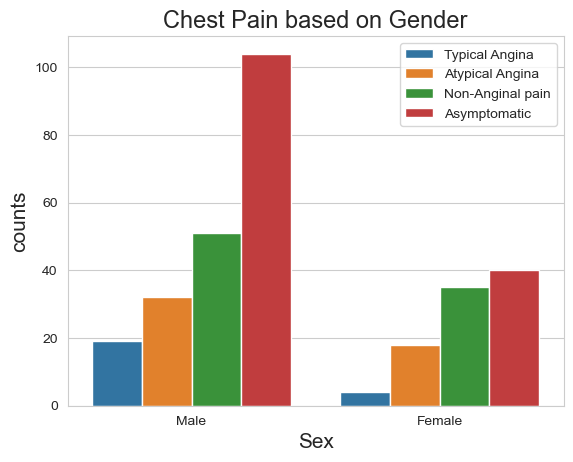

In [23]:
#count plot created of chest pain based on gender 

sns.countplot(x=df['sex1'],hue='cp',data = df )
plt.title('Chest Pain based on Gender',fontsize= 17)
plt.xlabel('Sex',fontsize=15)
plt.ylabel('counts',fontsize=15)
plt.legend(labels=['Typical Angina','Atypical Angina','Non-Anginal pain','Asymptomatic'])
plt.show()           

#### We can see that a high number of men are suffering from asymptomatic type of Chest pain.

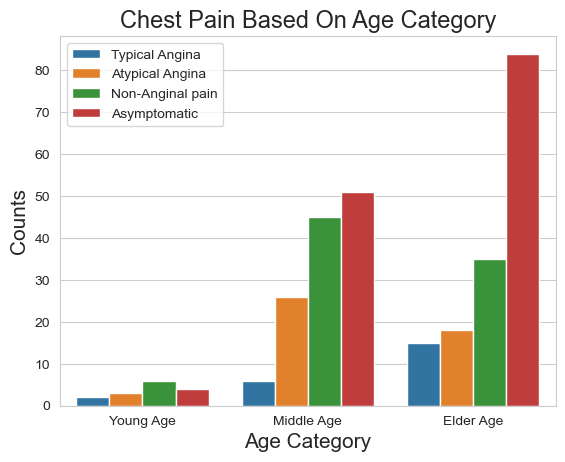

In [24]:
#Count Plot Creation of Chest Pain Based On Age Category using MatplotLib and Seaborn

sns.countplot(x=df['Age_Range'], hue='cp', data=df, order=['Young Age', 'Middle Age', 'Elder Age'])
plt.title('Chest Pain Based On Age Category', fontsize=17)
plt.xlabel('Age Category', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.legend(labels=['Typical Angina','Atypical Angina','Non-Anginal pain','Asymptomatic'])
plt.show()

### There is very high number of asymptomatic pain in elderly age category 

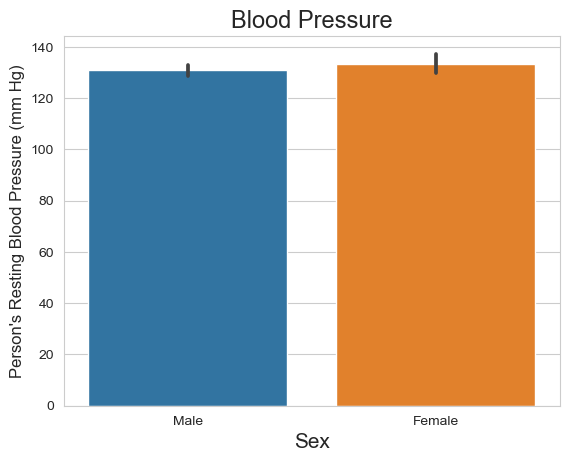

In [25]:
#Bar Plot Creation of Person's Resting Blood Pressure (mm Hg) 

sns.barplot(x='sex1', y='trestbps', data=df)
plt.title("Blood Pressure", fontsize=17)
plt.xlabel('Sex',fontsize=15)
plt.ylabel("Person's Resting Blood Pressure (mm Hg)", fontsize=12)
plt.show()

#### Blood Pressure Rate is almost equal in Males and Females

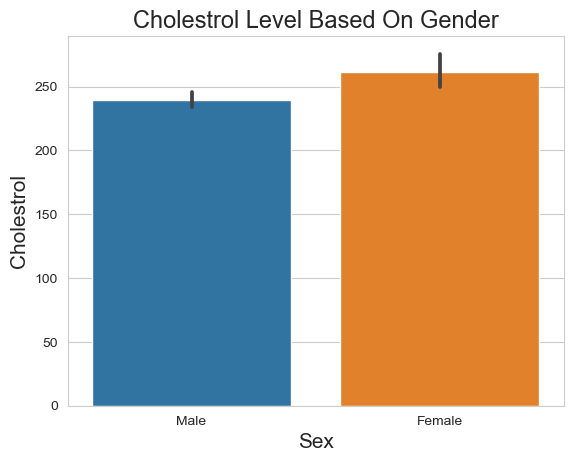

In [26]:
#Bar Plot Creation of Cholestrol Level Based On Gender using MatplotLib and Seaborn

sns.barplot(x='sex1', y='chol', data=df) 
plt.title("Cholestrol Level Based On Gender", fontsize=17)
plt.xlabel('Sex',fontsize=15)
plt.ylabel("Cholestrol", fontsize=15)
plt.show()

### The amount of cholestrol level is more in Females than Males. 

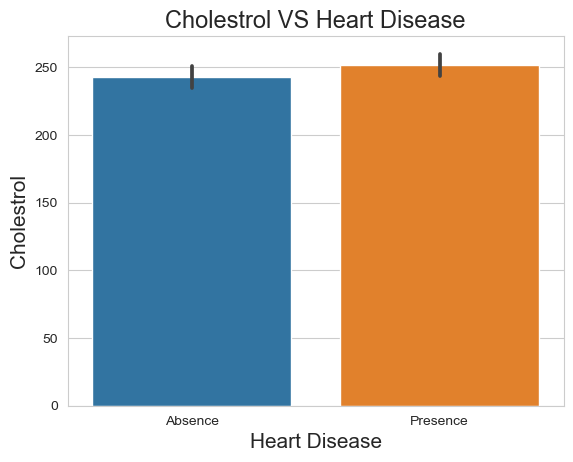

In [27]:
#Bar Plot Creation of Cholestrol VS Heart Disease using MatplotLib and Seaborn

sns.barplot(x='Heart_Disease', y='chol', data=df)
plt.title('Cholestrol VS Heart Disease', fontsize=17)
plt.xlabel('Heart Disease', fontsize=15)
plt.ylabel('Cholestrol', fontsize=15)
plt.show()

### Higher Cholestrol level results chances of heart disease 

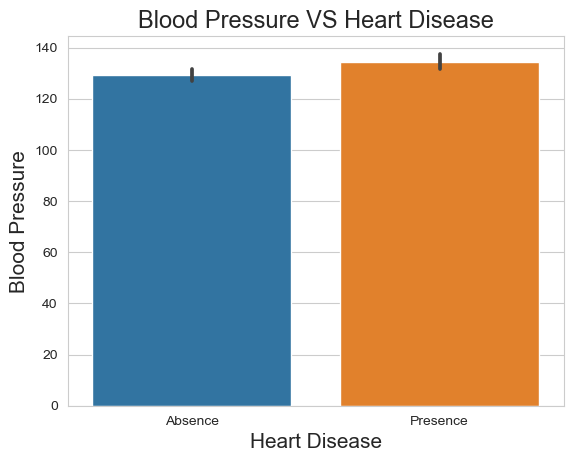

In [28]:
#Bar Plot Creation of Blood Pressure VS Heart Disease using MatplotLib and Seaborn

sns.barplot(x='Heart_Disease', y='trestbps', data=df)
plt.title('Blood Pressure VS Heart Disease', fontsize=17)
plt.xlabel('Heart Disease', fontsize=15)
plt.ylabel('Blood Pressure', fontsize=15)
plt.show()

### Higher Blood Pressure Level results Chances Of Heart Disease

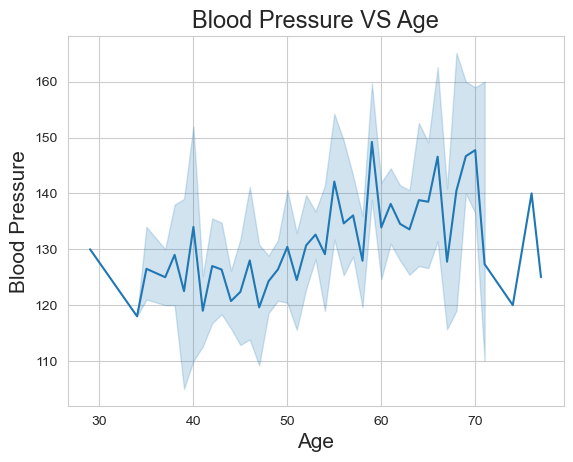

In [29]:
#Line Plot Creation of Blood Pressure VS Age 

sns.lineplot(x='age', y='trestbps', data=df)
plt.title('Blood Pressure VS Age', fontsize=17)
plt.xlabel('Age', fontsize=15)
plt.ylabel('Blood Pressure', fontsize=15)
plt.show()

### Higher Blood Pressure Level results Chances Of Heart Disease

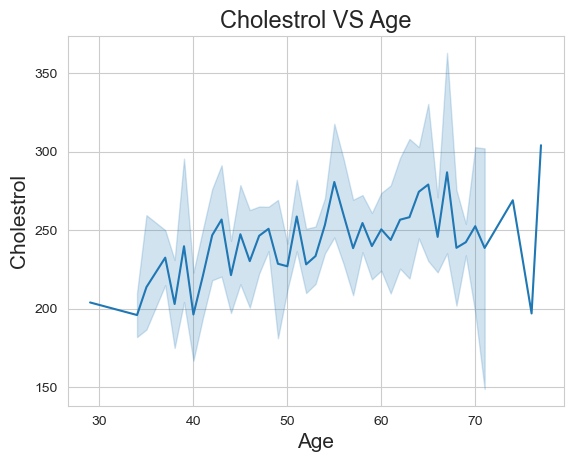

In [30]:
#Line Plot Creation of Cholestrol VS Age 

sns.lineplot(x='age', y='chol', data=df)
plt.title('Cholestrol VS Age', fontsize=17)
plt.xlabel('Age', fontsize=15)
plt.ylabel('Cholestrol', fontsize=15)
plt.show()

######  Similarly Cholestrol Increasing in the age group of 50-60

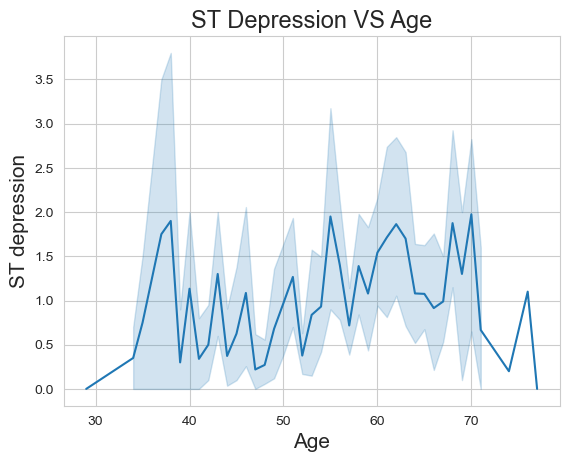

In [31]:
#Line Plot Creation of ST Depression VS Age

sns.lineplot(x='age', y='oldpeak', data=df)
plt.title('ST Depression VS Age', fontsize=17)
plt.xlabel('Age', fontsize=15)
plt.ylabel('ST depression', fontsize=15)
plt.show()

##### We can observe from here that ST depression mostly increases by the age group of 30-40

##### ST depression refers to a finding on an electrocardiogram, wherein the trace in the ST segment is abnormally low below the baseline.

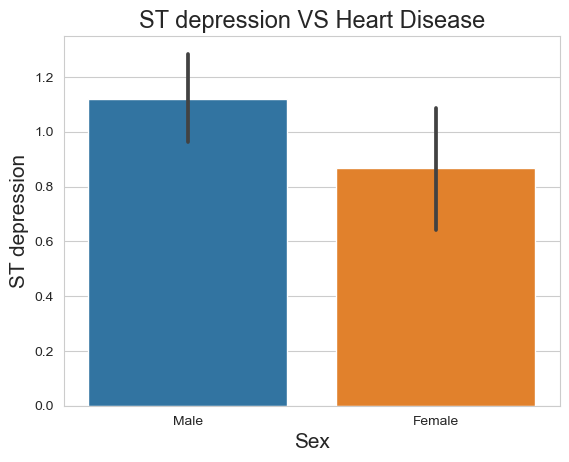

In [32]:
#Bar Plot Creation of ST depression VS Heart Disease

sns.barplot(x='sex1', y='oldpeak', data=df)
plt.title('ST depression VS Heart Disease', fontsize=17)
plt.xlabel('Sex', fontsize=15)
plt.ylabel('ST depression', fontsize=15)
plt.show()

#### More Males are prone to ST depression as compare to females

##### If you suffer from Angina, you may be concerned that exercise will make your symptoms worse.

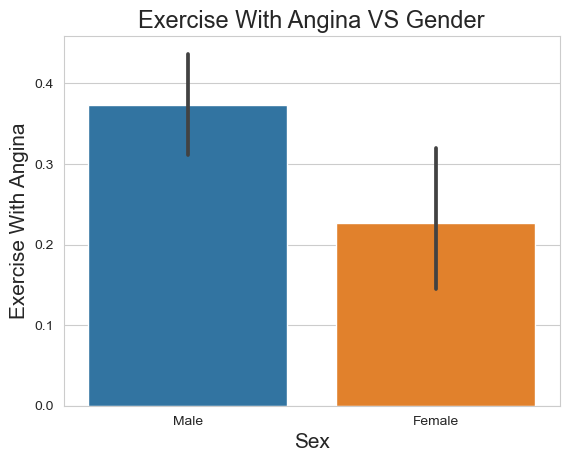

In [33]:
#Bar Plot Creation of Exercise With Angina VS Gender 

sns.barplot(x='sex1', y='exang', data=df)
plt.title('Exercise With Angina VS Gender', fontsize=17)
plt.xlabel('Sex', fontsize=15)
plt.ylabel('Exercise With Angina', fontsize=15)
plt.show()

#### Males have have high Exercise Angina

##### A type of chest pain caused by reduced blood flow to the heart.

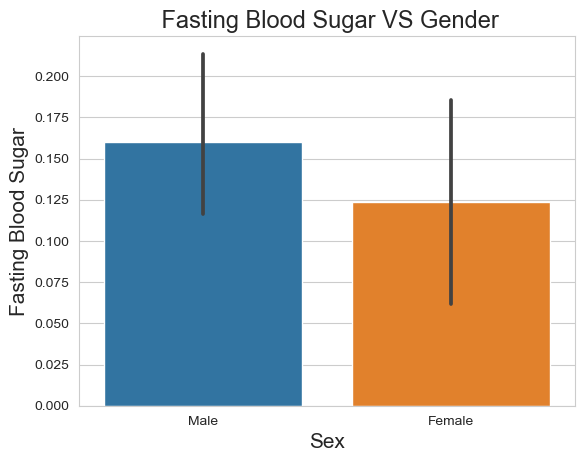

In [34]:
#Bar Plot Creation of Fasting Blood Sugar VS Gender 

sns.barplot(y='fbs', x='sex1', data=df)
plt.title(' Fasting Blood Sugar VS Gender', fontsize=17)
plt.xlabel('Sex', fontsize=15)
plt.ylabel('Fasting Blood Sugar', fontsize=15)
plt.show()

#### Males have high no of Fasting Blood Sugar over 120

C:\Users\Admin\AppData\Local\Temp\ipykernel_1732\533853432.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, linewidth=3)


<Axes: >

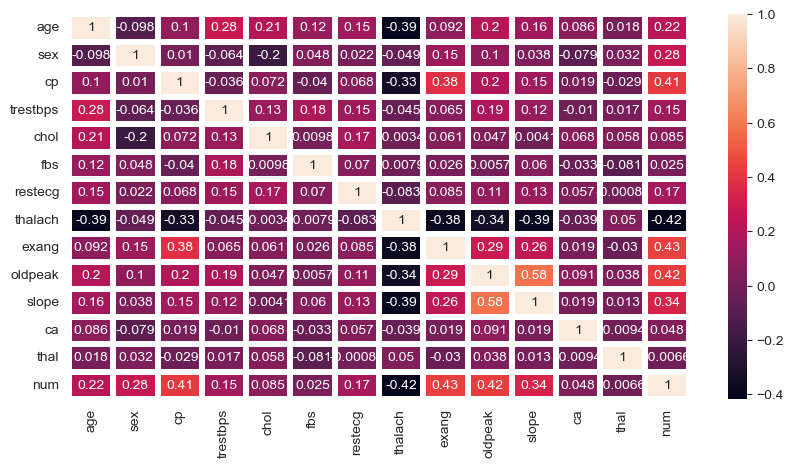

In [35]:
#Heatmap Creation using Seaborn

plt.figure(figsize=(10,5))
sns.heatmap(df.corr(), annot=True, linewidth=3)

#### Machine learning  implementation 

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [37]:
df= pd.read_csv('heart_disease_dataset.csv')
X = df.drop('num', axis=1)  # Features
y = df['num']  # Target

In [38]:
X.fillna(X.mean(), inplace=True)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [39]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42) #0.2=20% Data for testing and 80% for training 

In [40]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [41]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')




Accuracy: 0.87


In [42]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.82      0.93      0.87        29
           1       0.93      0.81      0.87        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.88      0.87      0.87        61

